In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [ ]:
from skimage import io, img_as_float
import numpy as np
import math
import os
from os import listdir
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import skimage.io as skio
from PIL import Image, ImageFilter
from scipy import ndimage 
from skimage.io import imread, imshow
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from PIL import Image, ImageStat


**Load arrays,** **Data** 

In [ ]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline


import os
import cv2 as cv2

folder_dir = "/content/drive/MyDrive/image_data_set/Train_Data/Fire/"
folder_dir2 = "/content/drive/MyDrive/image_data_set/Train_Data/Non_Fire/"
all_img = []
all = []
fire_array_img = []
non_fire_array_img = []
fire_array = []
non_fire_array = []
labels=[]

for images in os.listdir(folder_dir):  
    fire_array_img.append(cv2.imread(folder_dir+images))
    all_img.append(cv2.imread(folder_dir+images))
    labels.append("fire")
fire_array=np.array(fire_array_img)
for images in os.listdir(folder_dir2):  
  non_fire_array_img.append(cv2.imread(folder_dir2+images))
  all_img.append(cv2.imread(folder_dir2+images))
  labels.append("non-fire")
non_fire_array=np.array(non_fire_array_img)
all = np.array(all_img)

print("fire = ",fire_array)
print("non fire = ",non_fire_array)
print(labels)

<ipython-input-5-cbfc4e0c28c7>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fire_array=np.array(fire_array_img)


fire =  [array([[[196, 167, 136],
         [196, 167, 136],
         [196, 167, 136],
         ...,
         [189, 144, 110],
         [189, 143, 109],
         [189, 143, 109]],

        [[195, 166, 135],
         [195, 166, 135],
         [195, 166, 135],
         ...,
         [190, 145, 111],
         [190, 144, 110],
         [190, 144, 110]],

        [[193, 164, 133],
         [193, 164, 133],
         [193, 164, 133],
         ...,
         [191, 146, 112],
         [192, 146, 112],
         [191, 145, 111]],

        ...,

        [[  7,  16,  19],
         [ 15,  27,  27],
         [ 37,  50,  52],
         ...,
         [  5,   7,   7],
         [  3,   8,   7],
         [  5,   7,   7]],

        [[ 36,  48,  48],
         [ 29,  43,  41],
         [ 37,  55,  54],
         ...,
         [  6,   6,   6],
         [  4,   6,   6],
         [  6,   6,   6]],

        [[ 36,  50,  48],
         [ 27,  44,  41],
         [ 35,  56,  53],
         ...,
         [  6,   6,   6],


<ipython-input-5-cbfc4e0c28c7>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  non_fire_array=np.array(non_fire_array_img)
<ipython-input-5-cbfc4e0c28c7>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all = np.array(all_img)


**Functions**

In [ ]:
import numpy as np
import cv2 as cv
import skimage.measure 

from zmq.constants import NULL
#features, get mean for blue only since most masks color is blue
def mean_red(img):
  # print(img)
  return np.mean(img[:,:,0].flatten()) 

#features, get mean for green masks
def mean_green(img):
  return np.mean(img[:,:,1].flatten())

  
#Returns mean after applying canny filter used for edge detection
def cannyImage(img):
  img = cv.Canny(img,100,150)
  return np.mean(img.flatten())

#Contour
def contourImage(img):
  img=toGrayScale(img)
  ret,thresh=cv.threshold(img,150,255,cv.THRESH_BINARY) 
  return np.mean(thresh.flatten())

#Harris Corners
def harrisCorner(img):
  gray=toGrayScale(img)
  dst=cv.cornerHarris(gray,2,3,0.04)
  dst=cv.dilate(dst,None)
  # img[dst>0.01*dst.max()]=[0,0,255]
  return np.mean(img.flatten())

def toGrayScale(img):
  img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  return img

def entropy2(img):
  entropy_img = skimage.measure.shannon_entropy(img)
  return entropy_img

def sobel(img):
# Convert to graycsale
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Blur the image for better edge detection
  img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

  # Sobel Edge Detection
  sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
  sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
  sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
  return (np.mean(sobely.flatten()))


In [ ]:
                                                                 #features 
red_mean = []
green_mean = []
entropy_array = []
sobel_array = []
contour_array = []
canny_Image_array = []
harris_Corner_array = []
features_array = []
features_array_2=[]
features_array_4=[]
for i in all_img:
  if(i is None):
    continue

  features_array.append([mean_red(i),mean_green(i),entropy2(i),sobel(i),contourImage(i),cannyImage(i) ,harrisCorner(i)])
  features_array_2.append([mean_red(i),mean_green(i)])
  features_array_4.append([mean_red(i),mean_green(i),entropy2(i),sobel(i)])

**classifiers**

In [ ]:
                                                                          #CLASSIFICATION

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
labels = labels[:4609]
train_8x, test_8x, train_8y, test_8y= train_test_split(
        features_array, labels, test_size=0.33)

train_4_method_x, test_4_method_x, train_4_method_y, test_4_method_y= train_test_split(
        features_array_4, labels, test_size=0.33)

train_2_method_x, test_2_method_x, train_2_method_y, test_2_method_y= train_test_split(
        features_array_2, labels, test_size=0.33)


**RandomForestClassifier**

In [ ]:
clf = RandomForestClassifier(n_estimators=250)
clf.fit(train_8x, train_8y)
Predict_8 = clf.predict(test_8x)
print(f"Accuracy using 8 featuers with RandomForest: {accuracy_score(test_8y, Predict_8):%}")

clf4 = RandomForestClassifier(n_estimators=250)
clf4.fit(train_4_method_x, train_4_method_y)
Predict_4 = clf4.predict(test_4_method_x)
print(f"Accuracy using 4 featuers with RandomForest: {accuracy_score(test_4_method_y, Predict_4):%}")

clf2 = RandomForestClassifier(n_estimators=250)
clf2.fit(train_2_method_x, train_2_method_y)
Predict_2 = clf2.predict(test_2_method_x)
print(f"Accuracy using 2 featuers with RandomForest: {accuracy_score(test_2_method_y, Predict_2):%}")

Accuracy using 8 featuers with RandomForest: 88.757396%
Accuracy using 4 featuers with RandomForest: 80.210388%
Accuracy using 2 featuers with RandomForest: 74.030243%


In [ ]:
def getFeatures(img):
  return [mean_red(img),mean_green(img),entropy2(img),sobel(img),contourImage(img),cannyImage(img) ,harrisCorner(img)]

['fire']
['fire']
['fire']


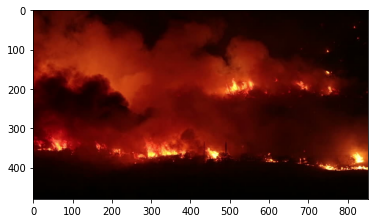

In [ ]:
import random 
randomInt=random.randint(0,4609)
image = all_img[randomInt]
image_features = getFeatures(image)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
Predict = clf.predict([image_features])
Predict2 = clf2.predict([image_features[:2]])
Predict4 = clf4.predict([image_features[:4]])
print(Predict)
print(Predict2)
print(Predict4)

**GaussianNB**

In [ ]:
GB = GaussianNB()
GB.fit(train_8x, train_8y)
Predict_8 = GB.predict(test_8x)
print(f"Accuracy using 8 featuers with GaussianNB: {accuracy_score(test_8y, Predict_8):%}")

GB_4 = GaussianNB()
GB_4.fit(train_4_method_x, train_4_method_y)
Predict_4_GB= GB_4.predict(test_4_method_x)
print(f"Accuracy using 4 featuers with GaussianNB: {accuracy_score(test_4_method_y, Predict_4_GB):%}")

GB_2 = GaussianNB(n_estimators=250)
GB_2.fit(train_2_method_x, train_2_method_y)
Predict_2_GB = GB_2.predict(test_2_method_x)
print(f"Accuracy using 2 featuers with GaussianNB: {accuracy_score(test_2_method_y, Predict_2_GB):%}")

Accuracy using 8 featuers with GaussianNB: 73.109796%
Accuracy using 4 featuers with GaussianNB: 72.649573%


TypeError: ignored

In [ ]:
import random 
randomInt=random.randint(0,4609)
image = all_img[randomInt]
image_features = getFeatures(image)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
GB_Predict = GB.predict([image_features])
GB_Predict_2 = GB_2.predict([image_features[:2]])
GB_Predict_4 = GB_4.predict([image_features[:4]])
print(GB_Predict)
print(GB_Predict_2)
print(GB_Predict_4)

**GradientBoostingClassifier**

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBC.fit(train_8x, train_8y)
Predict_8_GBC = GBC.predict(test_8x)
print(f"Accuracy using 8 featuers with GradientBoostingClassifier: {accuracy_score(test_8y, Predict_8_GBC):%}")

GBC_4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBC_4.fit(train_4_method_x, train_4_method_y)
Predict_4_GBC = GBC_4.predict(test_4_method_x)
print(f"Accuracy using 4 featuers with GradientBoostingClassifier: {accuracy_score(test_4_method_y, Predict_4_GBC):%}")
# print(f"Accuracy using 4 featuers with RandomForest: {accuracy_score(test_4_method_y, Predict_4_tree):%}")

GBC_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBC_2.fit(train_2_method_x, train_2_method_y)
Predict_2_GBC = GBC_2.predict(test_2_method_x)
print(f"Accuracy using 2 featuers with GradientBoostingClassifier: {accuracy_score(test_2_method_y, Predict_2_GBC):%}")


In [ ]:
import random 
randomInt=random.randint(0,4609)
image = all_img[randomInt]
image_features = getFeatures(image)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
GBC_Predict = GBC.predict([image_features])
GBC_Predict_4 = GBC_4.predict([image_features[:4]])
GBC_Predict_2 = GBC_2.predict([image_features[:2]])

print(GBC_Predict)
print(GBC_Predict_4)
print(GBC_Predict_2)

**DecisionTreeClassifier**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(train_8x, train_8y)
Predict_8_tree = tree_clf.predict(test_8x)
print(f"Accuracy using 8 featuers with RandomForest: {accuracy_score(test_8y, Predict_8_tree):%}")

tree_clf_4 = RandomForestClassifier(n_estimators=250)
tree_clf_4.fit(train_4_method_x, train_4_method_y)
Predict_4_tree = tree_clf_4.predict(test_4_method_x)
print(f"Accuracy using 4 featuers with RandomForest: {accuracy_score(test_4_method_y, Predict_4_tree):%}")

tree_clf_2 = RandomForestClassifier(n_estimators=250)
tree_clf_2.fit(train_2_method_x, train_2_method_y)
Predict_2_tree = tree_clf_2.predict(test_2_method_x)
print(f"Accuracy using 2 featuers with RandomForest: {accuracy_score(test_2_method_y, Predict_2_tree):%}")

In [ ]:
import random 
randomInt=random.randint(0,4609)
image = all_img[randomInt]
image_features = getFeatures(image)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
tree_clf_Predict = tree_clf.predict([image_features])
tree_clf_Predict_4 = tree_clf_4.predict([image_features[:4]])
tree_clf_Predict_2 = tree_clf_2.predict([image_features[:2]])
# Predict2 = GB2.predict([image_features[:2]])
print(tree_clf_Predict)
print(tree_clf_Predict_4)
print(tree_clf_Predict_2)
# print(Predict2)